# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Lecture 3 </span>

##  <span style="color:blue"> Exercise 3.1

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute European call-option price $C[S(0),0]$ and put-option price $P[S(0),0]$:
1. By sampling directly the final asset price $S(T)$ for a $GBM(r,\sigma^2)$
$$S(t) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
where $W(t)\sim\mathcal{N}(0,t)$.
2. By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
with $Z_i \sim \mathcal{N}(0,1)$

### Black-Scholes analytic solution

In [7]:
import scipy
from scipy.special import erf
# from scipy import log, exp, sqrt
import numpy.lib.scimath as np
from numpy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", round(call,5))
    print("put: ", round(put,5))
    print()

 == BLACK-SCHOLES ==
call:  14.97579
put:  5.45953



### 1. Direct sampling

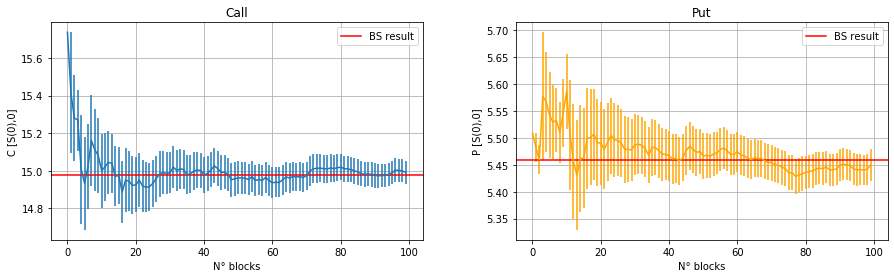

Call-option: C[S(0),0] =  14.9914  +/-  0.0615667
Put-option: P[S(0),0] =  5.44982  +/-  0.0292296


In [30]:
import numpy as np
import math
import matplotlib 
import matplotlib.pyplot as plt

N = 100
sum_prog = np.zeros(N)
err_prog = np.zeros(N)
sum_prog2 = np.zeros(N)
err_prog2 = np.zeros(N)
steps = np.arange(N)

file = open("./LSN_03.1/output_1_call.txt")
line = file.readlines()
for i in range(N):
    a = line[i].split("   ")
    sum_prog[i] = a[1]
    err_prog[i] = a[2]
    
file2 = open("./LSN_03.1/output_1_put.txt")
line2 = file2.readlines()
for i in range(N):
    b = line2[i].split("   ")
    sum_prog2[i] = b[1]
    err_prog2[i] = b[2]
    
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.errorbar(steps, sum_prog, yerr = err_prog)
plt.axhline(y = 14.97579, color = 'r', linestyle = '-', label='BS result')
plt.xlabel("N° blocks")
plt.ylabel("C [S(0),0]")
plt.grid(True)
plt.legend()
plt.title("Call")

plt.subplot(1, 2, 2)
plt.errorbar(steps, sum_prog2, yerr = err_prog2, color='orange')
plt.axhline(y = 5.45953, color = 'r', linestyle = '-', label='BS result')
plt.xlabel("N° blocks")
plt.ylabel("P [S(0),0]")
plt.grid(True)
plt.legend()
plt.title("Put")

plt.subplots_adjust(wspace=0.25)
plt.show()

print("Call-option: C[S(0),0] = ",sum_prog[N-1]," +/- ",err_prog[N-1])
print("Put-option: P[S(0),0] = ",sum_prog2[N-1]," +/- ",err_prog2[N-1])

### 2. Discrete sampling

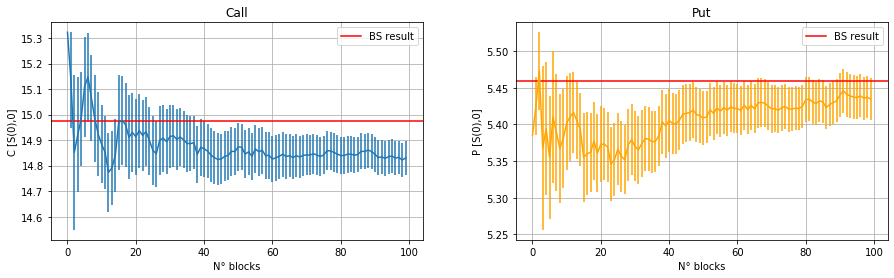

Call-option: C[S(0),0] =  14.8301  +/-  0.065424
Put-option: P[S(0),0] =  5.43458  +/-  0.0287399


In [31]:
import numpy as np
import math
import matplotlib 
import matplotlib.pyplot as plt

N = 100
sum_prog = np.zeros(N)
err_prog = np.zeros(N)
sum_prog2 = np.zeros(N)
err_prog2 = np.zeros(N)
steps = np.arange(N)

file = open("./LSN_03.1/output_2_call.txt")
line = file.readlines()
for i in range(N):
    a = line[i].split("   ")
    sum_prog[i] = a[1]
    err_prog[i] = a[2]
    
file2 = open("./LSN_03.1/output_2_put.txt")
line2 = file2.readlines()
for i in range(N):
    b = line2[i].split("   ")
    sum_prog2[i] = b[1]
    err_prog2[i] = b[2]
    
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.errorbar(steps, sum_prog, yerr = err_prog)
plt.axhline(y = 14.97579, color = 'r', linestyle = '-', label='BS result')
plt.xlabel("N° blocks")
plt.ylabel("C [S(0),0]")
plt.grid(True)
plt.legend()
plt.title("Call")

plt.subplot(1, 2, 2)
plt.errorbar(steps, sum_prog2, yerr = err_prog2, color='orange')
plt.axhline(y = 5.45953, color = 'r', linestyle = '-', label='BS result')
plt.xlabel("N° blocks")
plt.ylabel("P [S(0),0]")
plt.grid(True)
plt.legend()
plt.title("Put")

plt.subplots_adjust(wspace=0.25)
plt.show()

print("Call-option: C[S(0),0] = ",sum_prog[N-1]," +/- ",err_prog[N-1])
print("Put-option: P[S(0),0] = ",sum_prog2[N-1]," +/- ",err_prog2[N-1])